# Data-Centric NLP 대회: 주제 분류 프로젝트

## Load Libraries

In [ ]:
import os
import random
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset

from sklearn.model_selection import train_test_split

from utils import *
import matplotlib.pyplot as plt
import seaborn as sns

## Set Hyperparameters

In [2]:
SEED = 456
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

## Define Dataset

In [6]:
data = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
dataset_train, dataset_valid = train_test_split(data, test_size=0.3, random_state=SEED)

In [7]:
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
                       ID                               text  target
0     ynat-v1_train_00000   정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보       4
1     ynat-v1_train_00001        K찰.국DLwo 로L3한N% 회장 2 T0&}송=       3
2     ynat-v1_train_00002             m 김정) 자주통일 새,?r열1나가야1보       2
3     ynat-v1_train_00003      갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩       5
4     ynat-v1_train_00004       pI美대선I앞두고 R2fr단 발] $비해 감시 강화       6
...                   ...                                ...     ...
2795  ynat-v1_train_02795  트럼프 폭스뉴스 앵커들 충성도 점수매겨…10점만점에 12점도       6
2796  ynat-v1_train_02796        삼성 갤럭시S9 정식 출시 첫 주말 이통시장 잠잠       2
2797  ynat-v1_train_02797   텔레그램+한D 등h亞서 2시간H다운…C버T정gf39종!2보       4
2798  ynat-v1_train_02798    인터뷰 류현진 친구에게 안타 맞는 것 싫어해…승부는 냉정       1
2799  ynat-v1_train_02799               지능정보사회 대비 국가 종합대책 마련       4

[2800 rows x 3 columns]


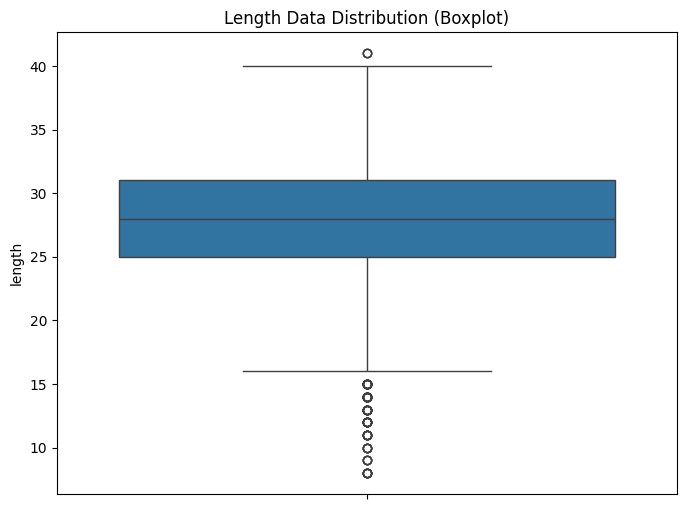

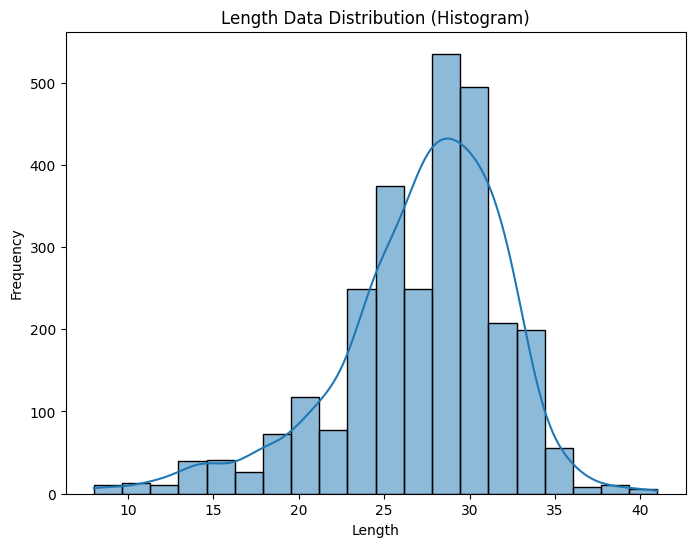

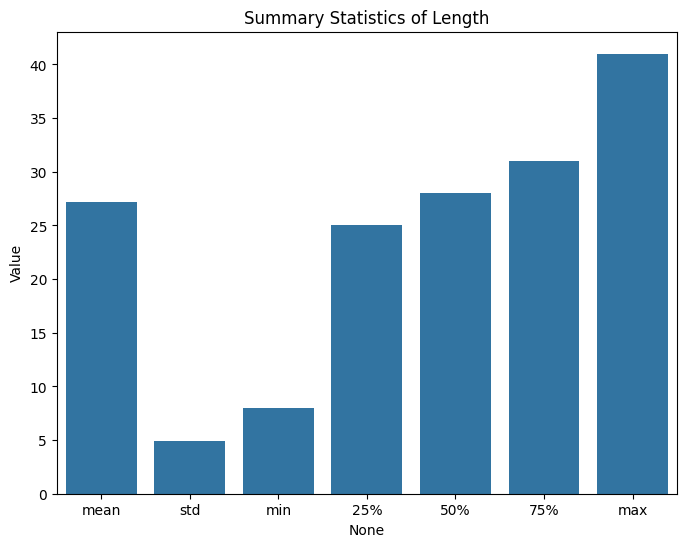

"\n# swarmplot\nplt.figure(figsize=(8, 6))\nsns.swarmplot(df['length'])\nplt.title('Length Data Distribution (Swarm Plot)')\nplt.show()\n"

In [8]:
df = data
data['length'] = data.text.map(len)
data['length'].describe()


# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(df['length'])
plt.title('Length Data Distribution (Boxplot)')
plt.show()

# histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['length'], kde=True, bins=20)
plt.title('Length Data Distribution (Histogram)')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

"""
# violin
plt.figure(figsize=(8, 6))
sns.violinplot(data['length'])
plt.title('Length Data Distribution (Violin Plot)')
plt.show()
"""

# describe 결과를 가져옴
desc_stats = df['length'].describe().drop('count')

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=desc_stats.index, y=desc_stats.values)
plt.title('Summary Statistics of Length')
plt.ylabel('Value')
plt.show()

"""
# length 결과를 가져옴
desc_stats = df['length']

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=desc_stats.index, y=desc_stats.values)
plt.title('Summary of Length barplot')
plt.ylabel('Value')
plt.show()
"""

"""
# swarmplot
plt.figure(figsize=(8, 6))
sns.swarmplot(df['length'])
plt.title('Length Data Distribution (Swarm Plot)')
plt.show()
"""


In [ ]:
c=0
for i, text in enumerate(data.text):
    if remove_korean(text).strip()=="":
        c+=1
print("num of korean:", c)

276


In [ ]:
for i, text in enumerate(data.text):
    print(i, remove_not_korean_without_space(text))

0 정 파 미사  이용기간  단 분종보
1 찰국 로한 회장  송
2  김정 자주통일 새열나가야보
3 갤노트 주말 만대 개통시장은 불법 보조금 얼룩
4 대선앞두고 단 발 비해 감시 강화
5 성인 명 중 명꼴 배우자연인 빚 떠안은 적 있다
6 프로야구롯광주 경기 천취소
7 아가메즈 득점 우리카드 손해보험 완파위 굳
8 대통령 얼마나 많이 놀라셨어요경주 지진현장 방문종합
9 듀얼심 아이폰 하반기 출시설 솔솔알뜰폰 기대감
10  매력 모츠열약 주가 고진
11 투자 월 옵션 만기일 매도 우세
12 황총리 각 부처 비상대비태세 철저히 강구해야
13 아이수리 대맥 디레 
14 문인 당  민관동사위 보 철거
15 게시판  박민정 책임연구원  이사 선출
16 공사업체 협박에 분쟁해결 명목 돈 받은 언론인 집행유예
17 월세 전환에 늘어나는 주거비 부담작년 역대 최고치
18 개전 연정연 작가
19 페이스북 인터넷 드론 아퀼라 실물 첫 시험비행 성공
20 추신수 타율 로 시즌 마감최지만은 홈런
21  수단팬께하는호족 한마 최
22 현차  임원늘려세 리 보 육
23 아시안게임 목소리 높인 박항서 베트남이 일본 못 이길
24 서울에 다시 오존주의보도심서북동북권 발령종합
25 선 폭 현장조
26 레콤 분기 영익천 증가
27 생인증안제 유되면 대 가끝
28  강감독 로축구연맹회부
29 축구인천  운드 영
30 해외로밍 금폭탄 동차단 더 빨진다
31 세계인무역협회 올 무역인 천 배출한
32 박항 매직베트남축구표팀 쏟
33 학 석면 거 규정지키
34 안보리 대북결의안 호 이행보고서 제출한 나라 개 육박
35 게시판  코로나가 바꾼 일상 대국민 영상 공모
36 크루즈 관광객용 반나절 부산 해안 트레킹 상품 개발
37   생산 인공광에기보다에활적
38 마틴 우리카드 코치로 리그 복귀한국 좋아요
39   씽큐 일부터 예판디스플레이 회 무상교체 혜택
40 피폭 노동자가 증언하는 후쿠시마 원전 은폐와 속임수
41 다저스 버츠 감독류현 담당 포수최 환 만들
42  일 연상의장 견창조경제 논의
43 한

In [ ]:
c=0
for i, text in enumerate(data.text):
    origin_length = len(text)
    korean_length = len(remove_not_korean(text))
    not_korean_length = len(remove_korean(text))
    a= korean_length/origin_length*100
    b = not_korean_length/origin_length*100
    if b> 20:c+=1
print("num of not_korean:", c)

2645


In [ ]:
c=0
for i, text in enumerate(data.text):
    origin_length = len(text)
    asciicode_length = len(remove_not_asciicode(text))
    a= asciicode_length/origin_length*100
    if a>= 20:c+=1
print("num of asciicode:", c)

2562


In [ ]:
c=0
for i, text in enumerate(data.text):
    origin_length = len(text)
    asciicode_with_space_length = len(remove_not_asciicode_with_space(text))
    a= asciicode_with_space_length/origin_length*100
    if a>= 20:c+=1
print("num of asciicode_with_space:", c)

2562


In [ ]:
c=0
for i, text in enumerate(data.text):
    origin_length = len(text)
    asciicode_without_space_length = len(remove_not_asciicode_without_space(text))
    a= asciicode_without_space_length/origin_length*100
    if a>= 20:c+=1
print("num of asciicode_without_space:", c)


1648
